# MNIST Data Set - Basic Approach

In [1]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# Printing version of the TensorFlow
print(tf.__version__)

2.16.2


### Get the MNIST Data

In [3]:
mnist=keras.datasets.mnist # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [4]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
class_names

['Zero',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Nine']

### Evaluation of the data

In [18]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

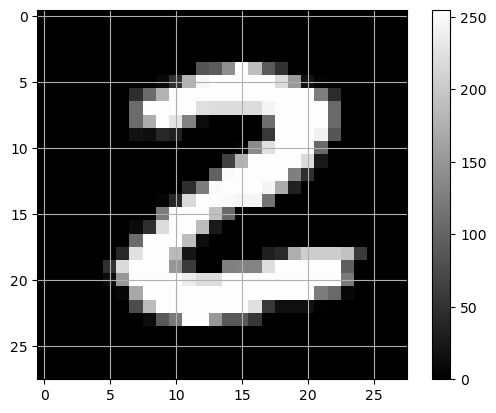

Class ID: 2 and Class name: Two


In [5]:
# inspect the data in the array

index=25 # change this number 
plt.imshow(xtrain[index], cmap="gray")
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

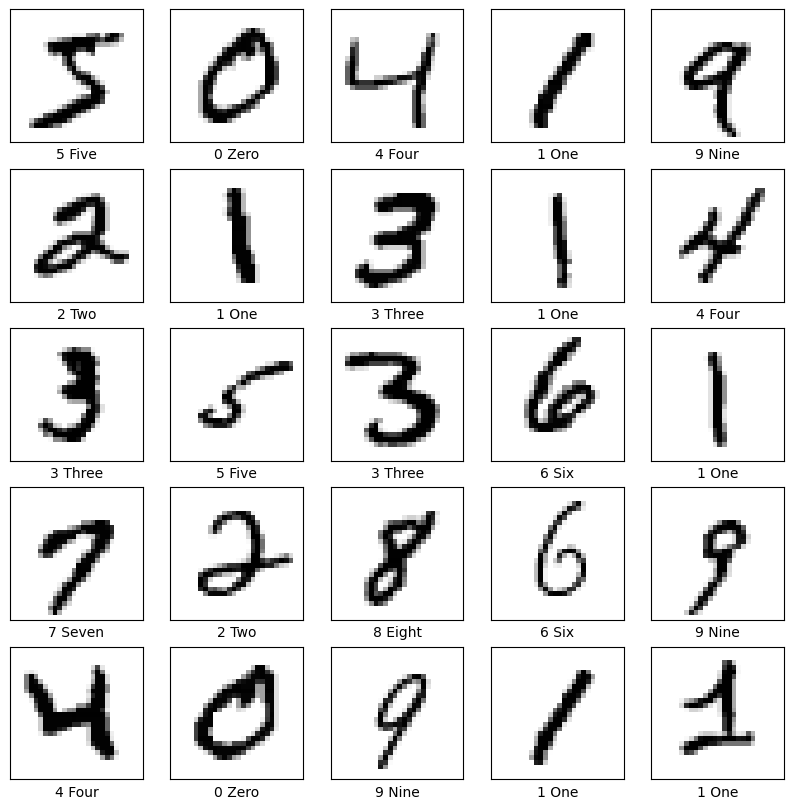

In [6]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

### Data Preparation

In [7]:
# Pixel value of the image falls between 0 to 255.

#xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
#print(xtrain.shape)

#xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
#print(xtest.shape)

In [8]:
# One hot encoding of the labels.
# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [5 0 4 ... 5 6 8]
ytest Shape: (10000,) and value: [7 2 1 ... 4 5 6]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Modelling - CNN

/Users/loandoan/Opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


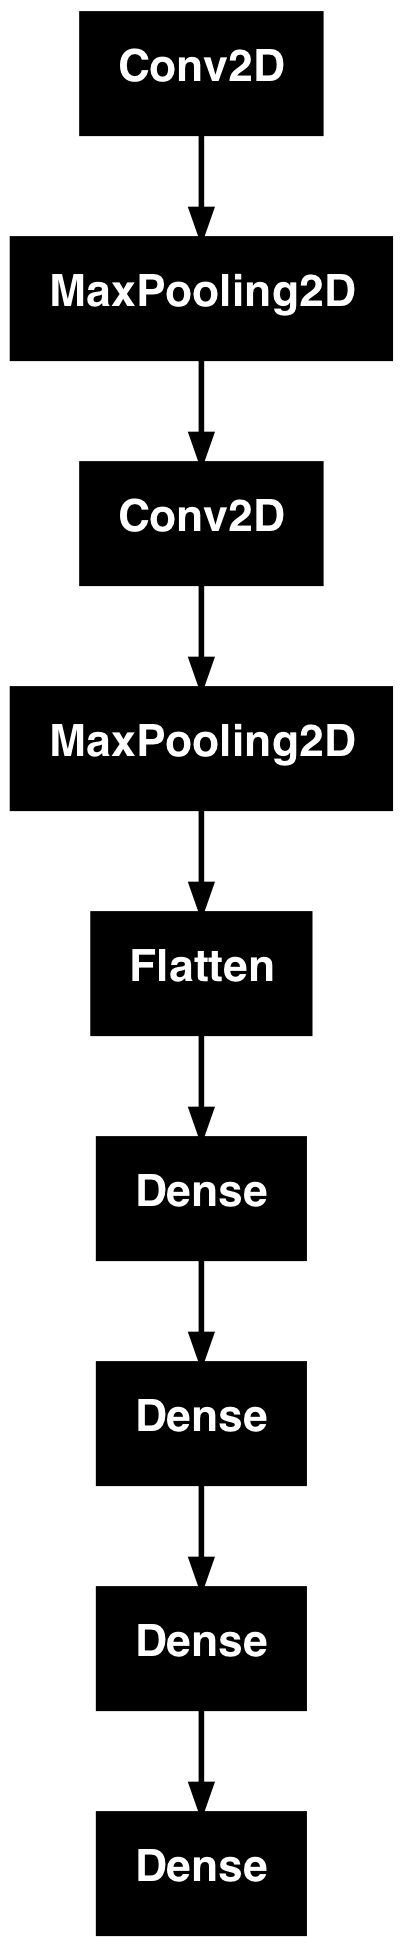

In [9]:
from tensorflow.keras import models, layers

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=10, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten()) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

In [10]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 10)     │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,528 (213.00 KB)

 Trainable params: 54,528 (213.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=20,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4875 - loss: 8.9991 - val_accuracy: 0.8414 - val_loss: 0.5523
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8602 - loss: 0.4902 - val_accuracy: 0.9087 - val_loss: 0.3090
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9203 - loss: 0.2735 - val_accuracy: 0.9360 - val_loss: 0.2243
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9411 - loss: 0.1946 - val_accuracy: 0.9481 - val_loss: 0.1826
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9550 - loss: 0.1499 - val_accuracy: 0.9546 - val_loss: 0.1581
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9629 - loss: 0.1225 - val_accuracy: 0.9586 - val_loss: 0.1418
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9670 - loss: 0.1073 - val_accuracy: 0.9639 - val_loss: 0.1326
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9737 - loss: 0.0887 - val_accuracy: 0.9670 - v

### Evaluation of the model

In [12]:
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9697 - loss: 0.1221
accuracy: 0.9750999808311462


In [13]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
1. Prediction array: [9.7011125e-13 4.9138655e-13 5.4207343e-11 1.1633585e-07 4.8260041e-14
 6.5576315e-13 3.4760006e-14 9.9999988e-01 9.1360816e-13 5.9529104e-11]
2. Label number having highest confidence in prediction array: 7
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Testing the model on data

In [14]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

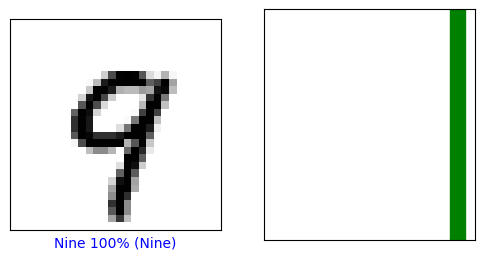

In [15]:
# call the function

# defining parameters to pass to function
i=12 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.9049406e-08 6.6963735e-10 5.5698405e-07 3.5802365e-11 9.9999797e-01
  8.9987090e-10 1.4589837e-07 2.1406661e-09 9.8946025e-09 1.3299225e-06]]


4

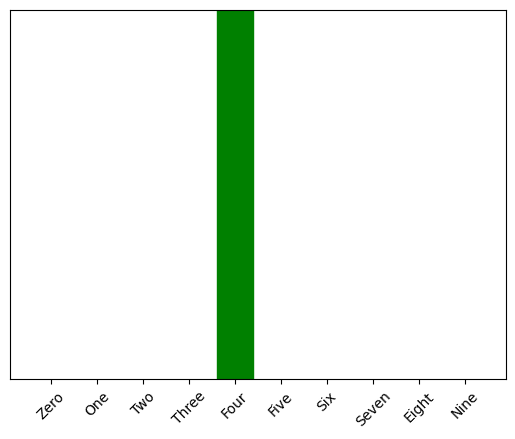

In [16]:
# verification our prediction on single image

i=24 # image number 24  . You may change value of i for play around
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

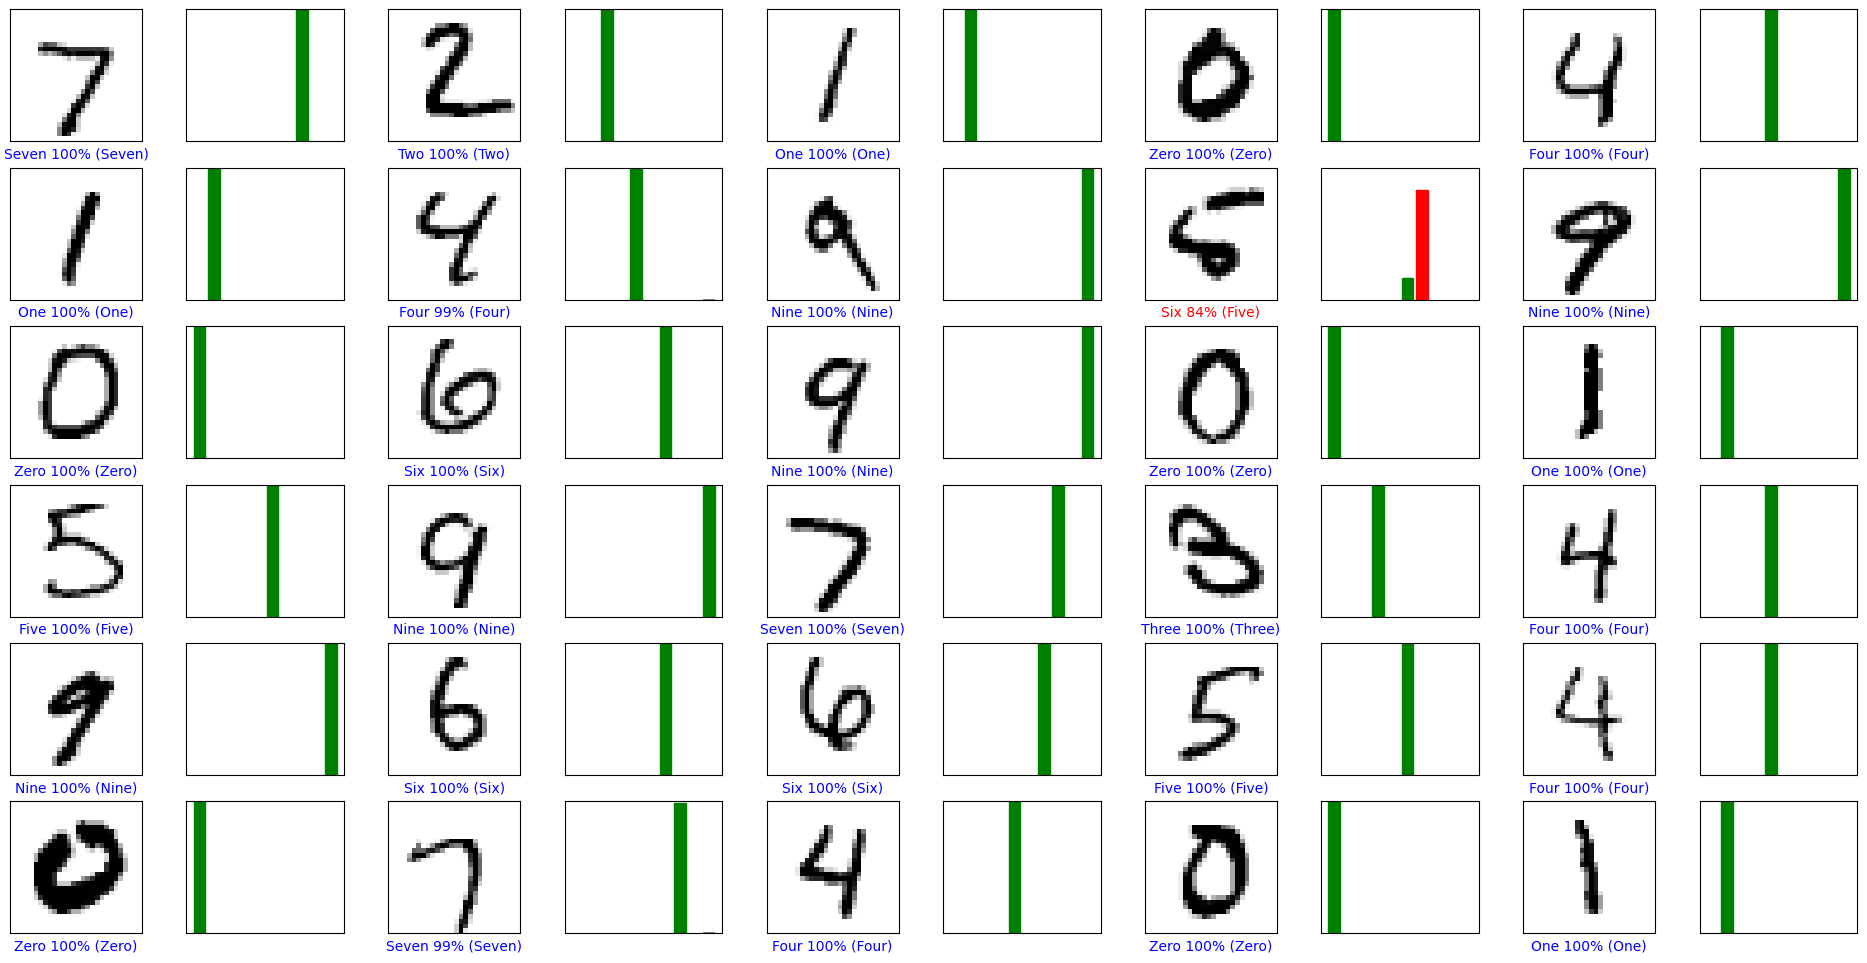

In [17]:
# verification of several images

num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(24,12))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()